# Industriel Engineering 
#### **Presented By :       Lian Refaelov , Shifra Fuchs, Osher Moyal , Dolev Levavi**

- Wrangling the data and Understanding it
- Audience Quiz: The most wanted position, The specialization where you earn the most
- Facility vs Salary
- Specialization vs Salary 
- Position vs Salary

### *Wrangling the data and Understanding it*

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
url = "IndustrielEngineeringData.csv"
industriel_data_df = pd.read_csv(url)
industriel_data_df.head()

,תאריך,סטטוס,מוסד לימודי,תחום,תפקיד,חברה,ניסיון,משכורת,סוג תשלום,הערות,רכב
0,08/01/2019 11:41,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,NaN,2+,20000.0,גלובלי,NaN,NaN
1,08/01/2019 11:49,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,NaN,לא
2,08/01/2019 12:03,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,NaN,1,3000.0,שעתי,NaN,לא
3,08/01/2019 12:05,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,NaN,לא
4,08/01/2019 12:09,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,NaN,לא


In [144]:
industriel_data_df.columns = ['Date', 'Status', 'Facility', 'Classification', 'Specialization', 'Company', 'Experience', 'Salary', 'Salary_kind', 'Remarks', 'Car']
industriel_data_df.head()

,Date,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Remarks,Car
0,08/01/2019 11:41,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,NaN,2+,20000.0,גלובלי,NaN,NaN
1,08/01/2019 11:49,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,NaN,לא
2,08/01/2019 12:03,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,NaN,1,3000.0,שעתי,NaN,לא
3,08/01/2019 12:05,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,NaN,לא
4,08/01/2019 12:09,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,NaN,לא


In [145]:
industriel_data_df['Date'] = pd.to_datetime(industriel_data_df['Date'])
industriel_data_df['Year'] = pd.DatetimeIndex(industriel_data_df['Date']).year
industriel_data_df.head()

,Date,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Remarks,Car,Year
0,2019-08-01 11:41:00,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,NaN,2+,20000.0,גלובלי,NaN,NaN,2019
1,2019-08-01 11:49:00,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,NaN,לא,2019
2,2019-08-01 12:03:00,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,NaN,1,3000.0,שעתי,NaN,לא,2019
3,2019-08-01 12:05:00,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,NaN,לא,2019
4,2019-08-01 12:09:00,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,NaN,לא,2019


In [146]:
industriel_data_df.dtypes

Date              datetime64[ns]
Status                    object
Facility                  object
Classification            object
Specialization            object
Company                   object
Experience                object
Salary                   float64
Salary_kind               object
Remarks                   object
Car                       object
Year                       int64
dtype: object

##### droping unnecessary columns and fixing missing values

In [147]:
industriel_data_df.isnull().sum().sort_values(ascending=False)

Remarks           278
Company           238
Car                19
Classification      1
Year                0
Salary_kind         0
Salary              0
Experience          0
Specialization      0
Facility            0
Status              0
Date                0
dtype: int64

In [148]:
irrelevant_columns=['Remarks','Date']
industriel_data_df.drop(irrelevant_columns,axis='columns' ,inplace=True)
industriel_data_df["Company"].fillna("לא הוזן",inplace=True)
industriel_data_df["Car"].fillna("לא הוזן",inplace=True)
industriel_data_df["Classification"].fillna("לא הוזן",inplace=True)
industriel_data_df.head()

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019


In [149]:
industriel_data_df.isnull().sum().sort_values(ascending=False)

Year              0
Car               0
Salary_kind       0
Salary            0
Experience        0
Company           0
Specialization    0
Classification    0
Facility          0
Status            0
dtype: int64

1

In [108]:
industriel_data_df.head()

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year
0,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019


In [150]:
pd.unique(industriel_data_df.Facility)

array(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן',
       'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'בן גוריון',
       'האקדמית עמק יזרעאל', 'האקדמית תל אביב יפו',
       'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב',
       'טכניון', 'לא מהנדס , הנדסאי', 'מוסד ממש טוב', 'מכללת אורט בראודה',
       'מכללת אפקה', 'מכללת סמי שמעון', 'מכללת ספיר', 'מכללת רופין',
       'מכללת שנקר'], dtype=object)

In [151]:
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "מוסד ממש טוב"].index, inplace=True)
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "לא מהנדס , הנדסאי"].index, inplace=True)

In [152]:
pd.unique(industriel_data_df.Facility)

array(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן',
       'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'בן גוריון',
       'האקדמית עמק יזרעאל', 'האקדמית תל אביב יפו',
       'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב',
       'טכניון', 'מכללת אורט בראודה', 'מכללת אפקה', 'מכללת סמי שמעון',
       'מכללת ספיר', 'מכללת רופין', 'מכללת שנקר'], dtype=object)

In [153]:
#industriel_data_df.iloc[industriel_data_df[industriel_data_df.Facility == "בן גוריון"].index, 1] = "אוניברסיטת בן גוריון"

In [155]:
industriel_data_df.loc[industriel_data_df[industriel_data_df.Facility == "בן גוריון"].index, "Facility"] = "אוניברסיטת בן גוריון"

In [114]:
pd.unique(industriel_data_df.Facility)

array(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן',
       'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'אוניברסיטת בן גוריון',
       'האקדמית עמק יזרעאל', 'האקדמית תל אביב יפו',
       'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב',
       'טכניון', 'מכללת אורט בראודה', 'מכללת אפקה', 'מכללת סמי שמעון',
       'מכללת ספיר', 'מכללת רופין', 'מכללת שנקר'], dtype=object)

In [157]:
my_type = []
for facility in industriel_data_df.Facility:
    if "אוניברסיטה" in facility or "אוניברסיטת" in facility:
        my_type.append("אוניברסיטה")
    elif "טכניון" in facility:
        my_type.append("אוניברסיטה")
    else:
        my_type.append("מכללה")
industriel_data_df['type'] = my_type
industriel_data_df

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year,type
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019,אוניברסיטה
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019,אוניברסיטה
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019,אוניברסיטה
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019,אוניברסיטה
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019,אוניברסיטה
...,...,...,...,...,...,...,...,...,...,...,...
474,סטודנט/ית,מכללת שנקר,הייטק,"ניתוח, עיצוב, איפיון והטמעה של מערכות מידע",FBC,1,5000.0,שעתי,לא,2021,מכללה
475,סטודנט/ית,מכללת שנקר,הייטק,Noc,Radware,1,70.0,שעתי,לא,2021,מכללה
476,סטודנט/ית,מכללת שנקר,הייטק,תפעול וייצור,לא הוזן,1,9500.0,גלובלי,לא,2021,מכללה
477,סטודנט/ית,מכללת שנקר,תעשייה מסורתית,ניתוח נתונים,לא הוזן,1,4000.0,שעתי,לא,2021,מכללה


In [131]:
pd.unique(industriel_data_df.Specialization)

array(['ניתוח נתונים', 'QA', 'רכז פרוייקטים', 'ניהול פרוייקטים PMO',
       'ניתוח, עיצוב, איפיון והטמעה של מערכות מידע, QA',
       'הנדסת ארגון ושיטות', 'ניתוח, עיצוב, איפיון והטמעה של מערכות מידע',
       'ניהול פרוייקטים,  PMO, ניתוח, עיצוב, איפיון והטמעה של מערכות מידע',
       'מיישם מערכות מידע', 'פלנר', 'אינטגרטור', 'תפעול וייצור',
       'תכנון ובקרה', 'רכש', 'ערכית תוכן , רשתות חברתיות',
       'ניהול פרוייקטים, PMO', 'ניהול פרוייקטים,  PMO',
       'ניתוח נתונים , ניתוח, עיצוב, איפיון והטמעה של מערכות מידע, QA',
       'Devops', 'הנדסת ארגון ושיטות, תפעול וייצור, לוגיסטיקה',
       'פתיחות תיקים ודוחות תפעוליים',
       'ניהול פרוייקטים,  PMO, ניתוח נתונים ',
       'פקיד מזונות, פתיחת תיקים ודוחות תפעוליים', 'הנדסת איכות',
       'הנדסת ארגון ושיטות, ייעוץ לוגיסטי', 'ניתוח נתונים , כלכלן',
       'ניהול מערכות מידע', 'ניתוח נתונים , הנדסת ארגון ושיטות',
       'ניתוח נתונים , מדעי נתונים ', 'ניהול פרוייקטים,  PMO, System',
       'הנדסת ארגון ושיטות, תפעול וייצור',
       '

In [160]:
#my_speciality = []
#for speciality in industriel_data_df.Specialization:
#    if "פרוייקטים" in speciality or "PMO" in speciality or "Product" in speciality:
#        my_type.append("ניהול פרוייקטים")
        
#for speciality in industriel_data_df.Specialization:
#    if "ניתוח" in speciality or "אנאליסט" in speciality or "נתונים" in speciality:
#        my_type.append("ניתוח נתונים")
        
#for speciality in industriel_data_df.Specialization:
#   if "רכש" in speciality or "ייצור" or "הטמעה" in speciality:
#      my_type.append("ניהול היצור")
        
#for speciality in industriel_data_df.Specialization:
#   if "QA" in speciality:
#      my_type.append("אבטחת איכות") 

#for speciality in industriel_data_df.Specialization:
#   if "ארגון ושיטות" in speciality:
#      my_type.append("ארגון ושיטות")
        
#for speciality in industriel_data_df.Specialization:
#    if not ("ניהול פרוייקטים" or "ניתוח נתונים" or "ניהול היצור" or "אבטחת איכות"):
#       my_type.append("אחר")
        
#industriel_data_df['speciality'] = my_speciality
#industriel_data_df.head()

In [ ]:
industriel_data_df.groupby("Specialization").Salary.mean().plot(kind="bar")

In [116]:
counts = pd.value_counts(industriel_data_df.Facility)

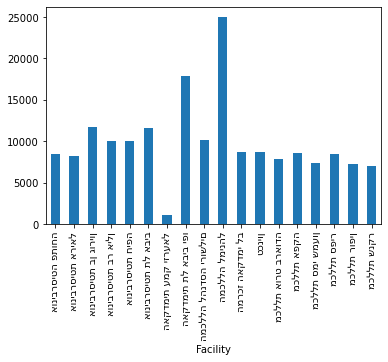

In [117]:
# industriel_data_df.groupby("Facility").Salary.mean().plot(kind="bar")
# RENAME
#temp2 = temp.rename(index={'שטח ברוטו': 'Total area','שנת בניה': 'Year of construction','קומה': 'Floor','דירות בבנין': 'Apartments in the building','חניה': 'Parking','קומות': 'Floors in the building','חדרים': 'Rooms'})
#temp2.plot(figsize=(10,6),kind="barh",color="gold",legend=False)
#plt.title("Feature importances",fontdict = font1)

In [118]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]

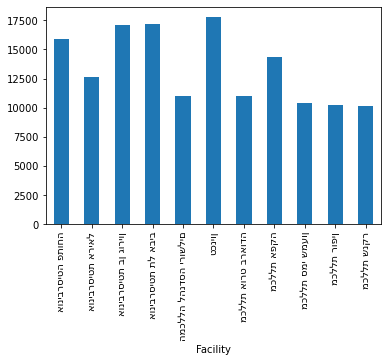

In [119]:
industriel_data_df_filter.groupby("Facility").Salary.mean().plot(kind="bar")

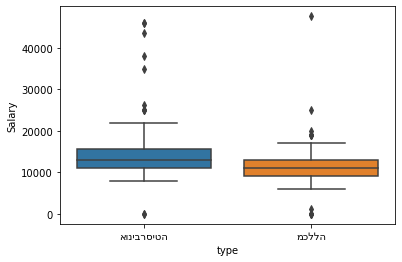

In [120]:
sns.boxplot(x="type", y="Salary", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])

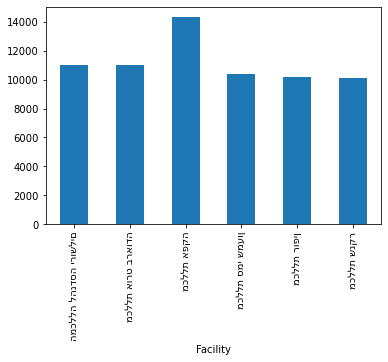

In [121]:
industriel_data_df_filter[industriel_data_df_filter.type == 'מכללה'].groupby("Facility").Salary.mean().plot(kind="bar")

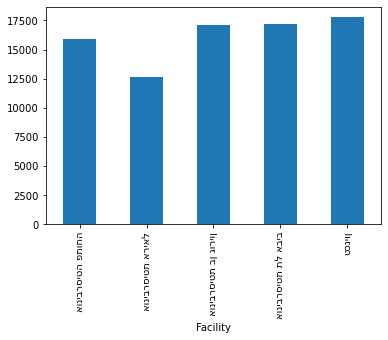

In [122]:
industriel_data_df_filter[industriel_data_df_filter.type == 'אוניברסיטה'].groupby("Facility").Salary.mean().plot(kind="bar")

2

In [123]:
pd.unique(industriel_data_df.Experience)

array(['2+', '1', '10+'], dtype=object)

In [124]:
pd.value_counts(industriel_data_df.Experience)

1      287
2+     180
10+     10
Name: Experience, dtype: int64

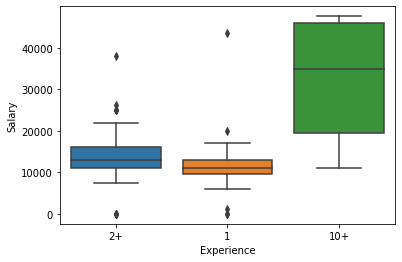

In [125]:
sns.boxplot(x="Experience", y='Salary',data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])

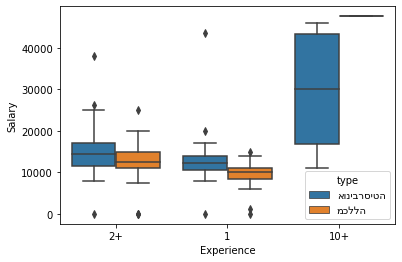

In [126]:
sns.boxplot(x="Experience", y='Salary', hue='type',data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])

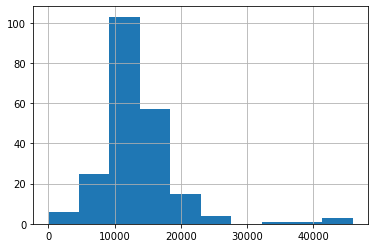

In [127]:
industriel_data_df_filter.Salary.hist()

In [128]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\lian refaelov\anaconda3\lib\site-packages (0.11.2)


In [129]:
sns.distplot(industriel_data_df_filter, x="Salary", hue="Classification")

TypeError: distplot() got an unexpected keyword argument 'x'

In [ ]:
counts = pd.value_counts(industriel_data_df.Classification)
industriel_data_df_filter_cls = industriel_data_df.loc[industriel_data_df.Classification.isin(counts[counts > 1].index), :]


In [ ]:
fig, ax = plt.fi
data = industriel_data_df_filter_cls.groupby("Classification").Salary.count()
data.plot.pie(autopct="%.1f%%")

In [ ]:
df = industriel_data_df[industriel_data_df.Salary > 7000]


In [ ]:
df.groupby("Year").Salary.mean().plot()

## sns.lineplot(x="Year", y='Salary', hue="type", data=df)
_ = plt.xticks([2019, 2020, 2021])

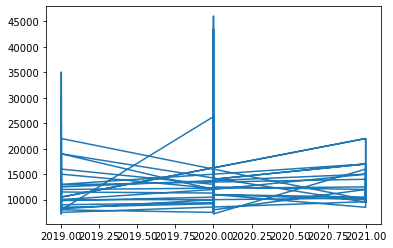

In [130]:
plt.plot(df.Year, df.Salary)